In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
sns.set(style="whitegrid")


In [23]:
travel_motives_mapping = {
    "2030170": "Travel to/from work, (non)-daily commute",
    "2030190": "Services/care",
    "2030200": "Shopping, groceries, fun shopping",
    "2030210": "Attending education/courses",
    "2030220": "Visits including staying overnight",
    "2030230": "Leisure, sports",
    "2030240": "Touring/walking",
    "2030250": "Other",
    "2820740": "Professionally",
    "T001080": "Total"
}


In [24]:
population_mapping = {
    "A048710": "Population 6 years or older",
    "A048709": "Population: 12 years or older"
}


In [25]:
travel_modes_mapping = {
    "T001093": "Total",
    "A048583": "Passenger car (driver)",
    "A048584": "Passenger car (passenger)",
    "A018981": "Train",
    "A018982": "Bus/tram/metro",
    "A018984": "Bike",
    "A018985": "Walking",
    "A018986": "Other"
}


In [26]:
margins_mapping = {
    "MW00000": "Value",
    "MOG0095": "Lower bound 95% confidence interval",
    "MBG0095": "Upper bound 95% confidence interval"
}


In [27]:
region_char_mapping = {
    "NL01    ": "The Netherlands",
    "LD01    ": "Noord-Nederland (LD)",
    "LD02    ": "Oost-Nederland (LD)",
    "LD03    ": "West-Nederland (LD)",
    "LD04    ": "Zuid-Nederland (LD)",
    "PV20    ": "Groningen (PV)",
    "PV21    ": "Fryslân (PV)",
    "PV22    ": "Drenthe (PV)",
    "PV23    ": "Overijssel (PV)",
    "PV24    ": "Flevoland (PV)",
    "PV25    ": "Gelderland (PV)",
    "PV26    ": "Utrecht (PV)",
    "PV27    ": "Noord-Holland (PV)",
    "PV28    ": "Zuid-Holland (PV)",
    "PV29    ": "Zeeland (PV)",
    "PV30    ": "Noord-Brabant (PV)",
    "PV31    ": "Limburg (PV)",
    "1018850 ": "Extremely urbanised",
    "1018905 ": "Strongly urbanised",
    "1018955 ": "Moderately urbanised",
    "1019005 ": "Hardly urbanised",
    "1019052 ": "Not urbanised"
}


In [28]:
periods_mapping = {
    "2018JJ00": "2018",
    "2019JJ00": "2019",
    "2020JJ00": "2020",
    "2021JJ00": "2021",
    "2022JJ00": "2022",
    "2023JJ00": "2023"
}


In [36]:
from data_rename import make_named_clean_dataset

# Define the path to your data directory and file
file_path = 'oud/84710ENG_TypedDataSet_30092024_142837.csv'

# Load the dataset
data = pd.read_csv(file_path, delimiter=';', encoding='utf-8')


# Define the path for the named data
named_file_path = 'test123.csv'

# Save the named data to CSV
data_named = make_named_clean_dataset(data)
data_named.to_csv(named_file_path, index=False)
print(f"Named data saved to '{named_file_path}'.")

# Display the first few rows
print("Initial Data:")
print(data.head(), "\n")


Data Shape After Dropping Missing Values: (38718, 13) 

Named data saved to 'test123.csv'.
Initial Data:
   ID  Trips_Per_Day  ...  RegionCharacteristics  Period
0   0           2.78  ...        The Netherlands    2018
1   1           2.71  ...        The Netherlands    2019
2   2           2.35  ...        The Netherlands    2020
3   3           2.51  ...        The Netherlands    2021
4   4           2.70  ...        The Netherlands    2022

[5 rows x 13 columns] 



In [30]:
# Get basic information about the dataset
print("Data Info:")
print(data.info(), "\n")

# Check for missing values
print("Missing Values:")
print(data.isnull().sum(), "\n")

# Summary statistics
print("Summary Statistics:")
print(data.describe(include='all'), "\n")


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63360 entries, 0 to 63359
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       63360 non-null  int64  
 1   Trips_Per_Day                            40002 non-null  float64
 2   Distance_Travelled_PassengerKm_Per_Day   39021 non-null  float64
 3   Time_Travelled_Minutes_Per_Day           39498 non-null  float64
 4   Trips_Per_Year                           40002 non-null  float64
 5   Distance_Travelled_PassengerKm_Per_Year  39021 non-null  float64
 6   Time_Travelled_Hours_Per_Year            39498 non-null  float64
 7   TravelMotives                            63360 non-null  object 
 8   Population                               63360 non-null  object 
 9   TravelModes                              63360 non-null  object 
 10  Margins                            

In [31]:
# Example: Renaming columns (adjust as per your actual column names)
data.rename(columns={
    "TravelMotives": "TravelMotivesCode",
    "Population": "PopulationCode",
    "TravelModes": "TravelModesCode",
    "Margins": "MarginsCode",
    "RegionCharacteristics": "RegionCharacteristicsCode",
    "Periods": "PeriodsCode",
    "Trips_1": "Trips_Per_Day",
    "DistanceTravelled_2": "Distance_Travelled_PassengerKm_Per_Day",
    "TimeTravelled_3": "Time_Travelled_Minutes_Per_Day",
    "Trips_4": "Trips_Per_Year",
    "DistanceTravelled_5": "Distance_Travelled_PassengerKm_Per_Year",
    "TimeTravelled_6": "Time_Travelled_Hours_Per_Year"
}, inplace=True)

# Display the renamed columns
print("Renamed Columns:")
print(data.columns, "\n")


Renamed Columns:
Index(['ID', 'Trips_Per_Day', 'Distance_Travelled_PassengerKm_Per_Day',
       'Time_Travelled_Minutes_Per_Day', 'Trips_Per_Year',
       'Distance_Travelled_PassengerKm_Per_Year',
       'Time_Travelled_Hours_Per_Year', 'TravelMotivesCode', 'PopulationCode',
       'TravelModesCode', 'MarginsCode', 'RegionCharacteristicsCode',
       'Period'],
      dtype='object') 



In [35]:
data['TravelMotives'] = data['TravelMotivesCode'].map(travel_motives_mapping)


data['Population'] = data['PopulationCode'].map(population_mapping)

data['TravelModes'] = data['TravelModesCode'].map(travel_modes_mapping)

data['Margins'] = data['MarginsCode'].map(margins_mapping)

data['RegionCharacteristics'] = data['RegionCharacteristicsCode'].map(region_char_mapping)

data['Period'] = data['PeriodsCode'].map(periods_mapping)

print(data.columns)


KeyError: 'TravelMotivesCode'

In [23]:
# List of original code columns to drop
code_columns = [
    'TravelMotivesCode',
    'PopulationCode',
    'TravelModesCode',
    'MarginsCode',
    'RegionCharacteristicsCode',
    'PeriodsCode'
]

# Drop the code columns
data.drop(columns=code_columns, inplace=True)



In [24]:
print("Data with Mapped Titles:")
print(data.head(), "\n")


Data with Mapped Titles:
   ID  Trips_Per_Day  Distance_Travelled_PassengerKm_Per_Day  \
0   0           2.78                                   36.16   
1   1           2.71                                   36.00   
2   2           2.35                                   24.88   
3   3           2.51                                   27.24   
4   4           2.70                                   30.21   

   Time_Travelled_Minutes_Per_Day  Trips_Per_Year  \
0                           74.60          1015.0   
1                           74.39           989.0   
2                           61.96           861.0   
3                           69.85           915.0   
4                           72.69           984.0   

   Distance_Travelled_PassengerKm_Per_Year  Time_Travelled_Hours_Per_Year  \
0                                  13200.0                          453.8   
1                                  13140.0                          452.6   
2                                   9105

In [25]:
# List of numerical columns
numeric_columns = [
    'Trips_Per_Day',
    'Distance_Travelled_PassengerKm_Per_Day',
    'Time_Travelled_Minutes_Per_Day',
    'Trips_Per_Year',
    'Distance_Travelled_PassengerKm_Per_Year',
    'Time_Travelled_Hours_Per_Year'
]

# Convert columns to numeric, coercing errors to NaN
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Verify data types
print("Data Types After Conversion:")
print(data.dtypes, "\n")


Data Types After Conversion:
ID                                           int64
Trips_Per_Day                              float64
Distance_Travelled_PassengerKm_Per_Day     float64
Time_Travelled_Minutes_Per_Day             float64
Trips_Per_Year                             float64
Distance_Travelled_PassengerKm_Per_Year    float64
Time_Travelled_Hours_Per_Year              float64
TravelMotives                               object
Population                                  object
TravelModes                                 object
Margins                                     object
RegionCharacteristics                       object
Period                                      object
dtype: object 



In [168]:
# Check for missing values after mapping and conversion
print("Missing Values After Mapping and Conversion:")
print(data.isnull().sum(), "\n")

# Define the path for the named data
named_file_path = 'named_mobility_data.csv'

# Save the named data to CSV
print("Data shape before dropping missing values:",data.shape, "\n" )
data.to_csv(named_file_path, index=False)
print(f"Named data saved to '{named_file_path}'.")


# Identify rows with any missing values
rows_with_missing = data[data.isnull().any(axis=1)]

print(f"Total rows with missing data: {rows_with_missing.shape[0]}")


# Define the list of relevant columns
relevant_columns = ['TravelMotives', 'Population', 'TravelModes', 'Margins', 'RegionCharacteristics', 'Period']

# Ensure that these columns exist in the dataset
for col in relevant_columns:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' not found in the dataset.")

# Select the relevant columns from the missing rows
selected_missing = rows_with_missing[relevant_columns]

# Display the first few rows of the selected data
print("Selected Columns from Rows with Missing Values:")
print(selected_missing.head(), "\n")


# Drop duplicate combinations
unique_combinations = selected_missing.drop_duplicates()

"""
# Count the number of unique combinations
num_unique_combinations = unique_combinations.shape[0]

# Display the result
print(f"Number of unique combinations of Population, TravelModes, Margins, RegionCharacteristics, and Period with missing values: {num_unique_combinations}\n")


# Display all unique combinations
print("Unique Combinations:")
print(unique_combinations.to_string(index=False))
"""

# Calculate unique entries and their frequencies for each column
unique_entries_per_column = {}

# Loop through each column and calculate the unique values and their frequencies
for column in unique_combinations.columns:
    unique_entries_per_column[column] = unique_combinations[column].value_counts()

# Display the result for each column
for column, value_counts in unique_entries_per_column.items():
    print(f"Column: {column}")
    print(value_counts)
    print("\n")


# Summary statistics for numerical features
print(rows_with_missing.describe())




Missing Values After Mapping and Conversion:
ID                                             0
Trips_Per_Day                              23358
Distance_Travelled_PassengerKm_Per_Day     24339
Time_Travelled_Minutes_Per_Day             23862
Trips_Per_Year                             23358
Distance_Travelled_PassengerKm_Per_Year    24339
Time_Travelled_Hours_Per_Year              23862
TravelMotives                                  0
Population                                     0
TravelModes                                    0
Margins                                        0
RegionCharacteristics                          0
Period                                         0
dtype: int64 

Data shape before dropping missing values: (63360, 13) 



Named data saved to 'named_mobility_data.csv'.
Total rows with missing data: 24642
Selected Columns from Rows with Missing Values:
     TravelMotives                   Population TravelModes Margins  \
1220         Total  Population 6 years or older       Train   Value   
1222         Total  Population 6 years or older       Train   Value   
1225         Total  Population 6 years or older       Train   Value   
1226         Total  Population 6 years or older       Train   Value   
1227         Total  Population 6 years or older       Train   Value   

     RegionCharacteristics Period  
1220        Groningen (PV)   2020  
1222        Groningen (PV)   2022  
1225          Fryslân (PV)   2019  
1226          Fryslân (PV)   2020  
1227          Fryslân (PV)   2021   

Column: TravelMotives
TravelMotives
Professionally                              3954
Services/care                               3588
Touring/walking                             3027
Attending education/courses              

In [27]:
# Option 1: Drop rows with any missing values
clean_data = data.dropna()

# Option 2: Impute missing values (e.g., fill with mean or median)
# Example: Fill numerical columns with median
# for col in numeric_columns:
#     clean_data[col] = data[col].fillna(data[col].median())

# For this guide, we'll proceed with Option 1
print("Data Shape After Dropping Missing Values:", clean_data.shape, "\n")

Data Shape After Dropping Missing Values: (38718, 13) 



/var/folders/zc/64yfk3l16nl3_zq6lr9yl6km0000gn/T/ipykernel_59473/3113688847.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_trips, x='Trips_Per_Year', y='TravelMotives', palette='viridis')


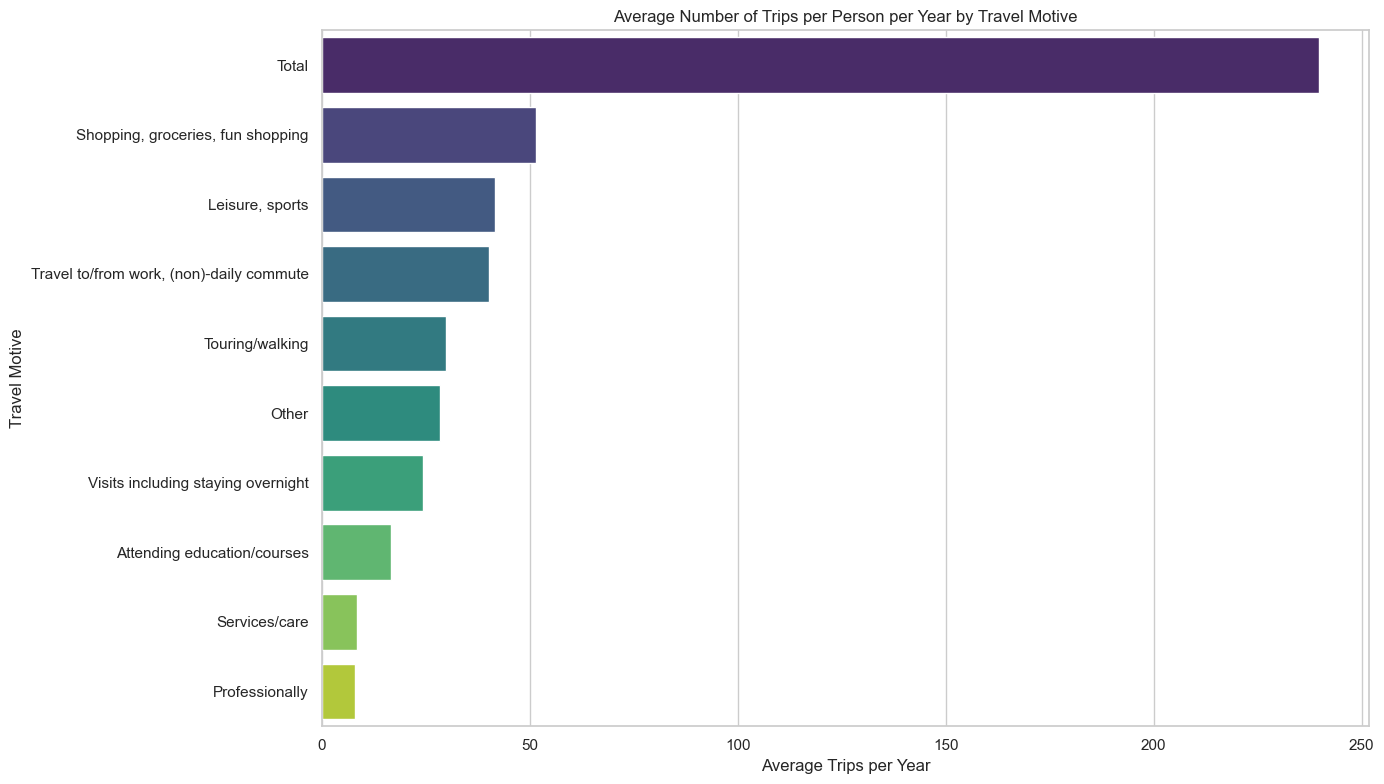

In [28]:
# Filter data for 'Population 6 years or older' and 'The Netherlands' and 'Value' margin
filtered_trips = clean_data[
    (clean_data['Population'] == 'Population 6 years or older') &
    (clean_data['RegionCharacteristics'] == 'The Netherlands') &
    (clean_data['Margins'] == 'Value')
]

# Group by Travel Motive and calculate average trips per year
avg_trips = filtered_trips.groupby('TravelMotives')['Trips_Per_Year'].mean().reset_index()

# Sort the data for better visualization
avg_trips.sort_values('Trips_Per_Year', inplace=True, ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_trips, x='Trips_Per_Year', y='TravelMotives', palette='viridis')
plt.title('Average Number of Trips per Person per Year by Travel Motive')
plt.xlabel('Average Trips per Year')
plt.ylabel('Travel Motive')
plt.tight_layout()
plt.show()


/var/folders/zc/64yfk3l16nl3_zq6lr9yl6km0000gn/T/ipykernel_59473/2551151558.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_distance, x='Distance_Travelled_PassengerKm_Per_Year', y='TravelModes', palette='magma')


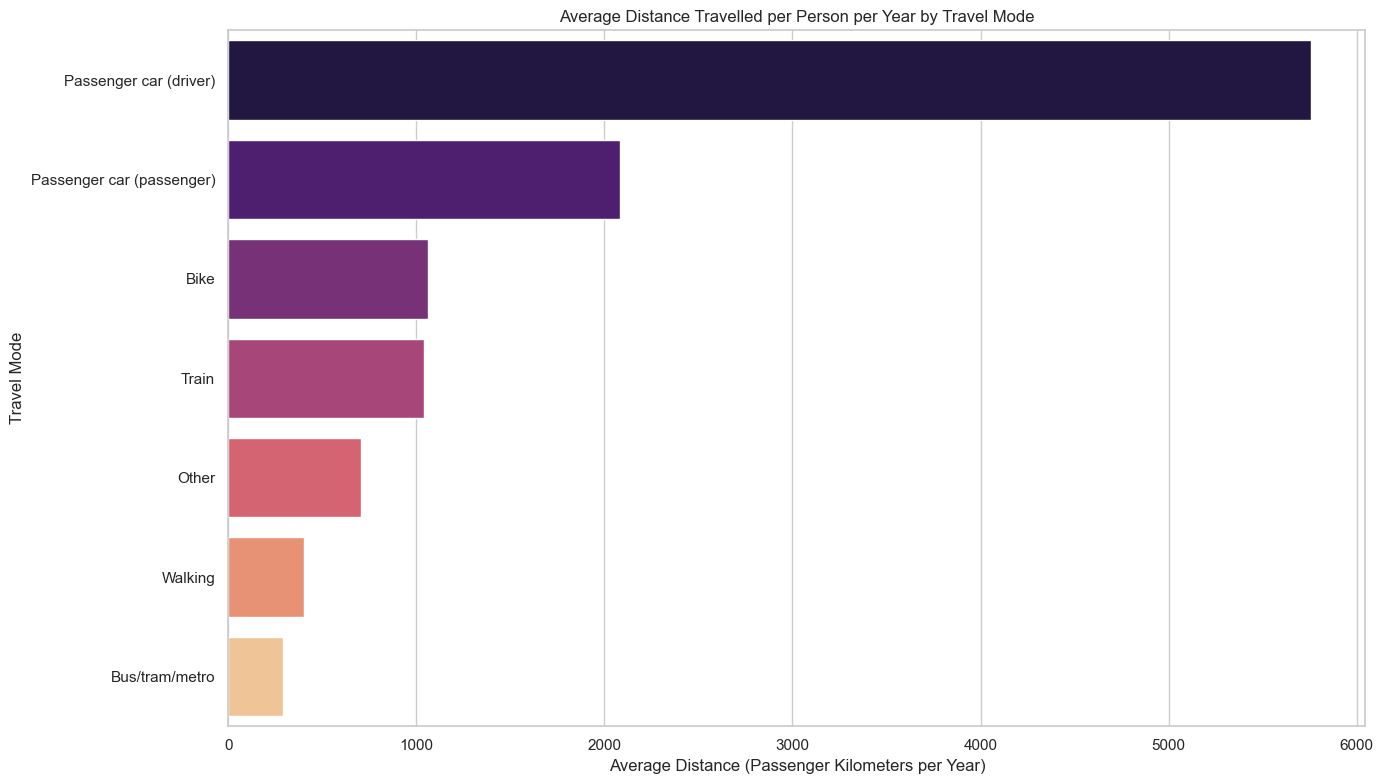

In [29]:
# Filter data for 'Total' travel motives and 'Total' travel modes
filtered_distance = clean_data[
    (clean_data['Population'] == 'Population 6 years or older') &
    (clean_data['TravelMotives'] == 'Total') &
    (clean_data['RegionCharacteristics'] == 'The Netherlands') &
    (clean_data['Margins'] == 'Value')
]

# Group by Travel Mode and calculate average distance
avg_distance = filtered_distance.groupby('TravelModes')['Distance_Travelled_PassengerKm_Per_Year'].mean().reset_index()

# Remove 'Total' from Travel Modes if present
avg_distance = avg_distance[avg_distance['TravelModes'] != 'Total']

# Sort the data
avg_distance.sort_values('Distance_Travelled_PassengerKm_Per_Year', inplace=True, ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_distance, x='Distance_Travelled_PassengerKm_Per_Year', y='TravelModes', palette='magma')
plt.title('Average Distance Travelled per Person per Year by Travel Mode')
plt.xlabel('Average Distance (Passenger Kilometers per Year)')
plt.ylabel('Travel Mode')
plt.tight_layout()
plt.show()


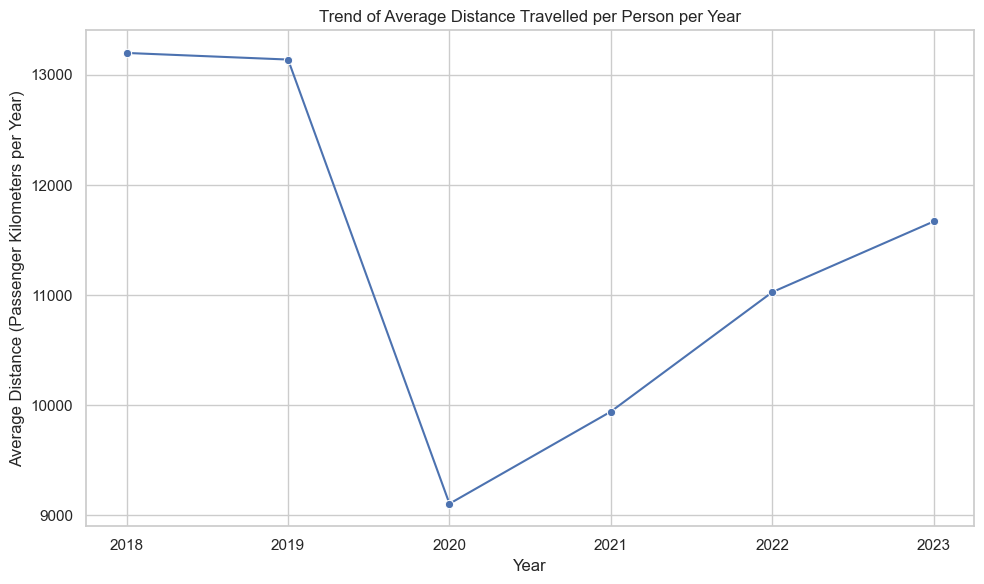

In [30]:
# Filter data for 'Total' travel motives and 'Total' travel modes
trend_data = clean_data[
    (clean_data['TravelMotives'] == 'Total') &
    (clean_data['TravelModes'] == 'Total') &
    (clean_data['Population'] == 'Population 6 years or older') &
    (clean_data['RegionCharacteristics'] == 'The Netherlands') &
    (clean_data['Margins'] == 'Value')
]

# Group by Period and calculate average distance
distance_trend = trend_data.groupby('Period')['Distance_Travelled_PassengerKm_Per_Year'].mean().reset_index()

# Sort by Period
distance_trend['Period'] = distance_trend['Period'].astype(int)
distance_trend.sort_values('Period', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=distance_trend, x='Period', y='Distance_Travelled_PassengerKm_Per_Year', marker='o')
plt.title('Trend of Average Distance Travelled per Person per Year')
plt.xlabel('Year')
plt.ylabel('Average Distance (Passenger Kilometers per Year)')
plt.tight_layout()
plt.show()


/var/folders/zc/64yfk3l16nl3_zq6lr9yl6km0000gn/T/ipykernel_59473/3788717328.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_time, x='Time_Travelled_Hours_Per_Year', y='TravelMotives', palette='coolwarm')


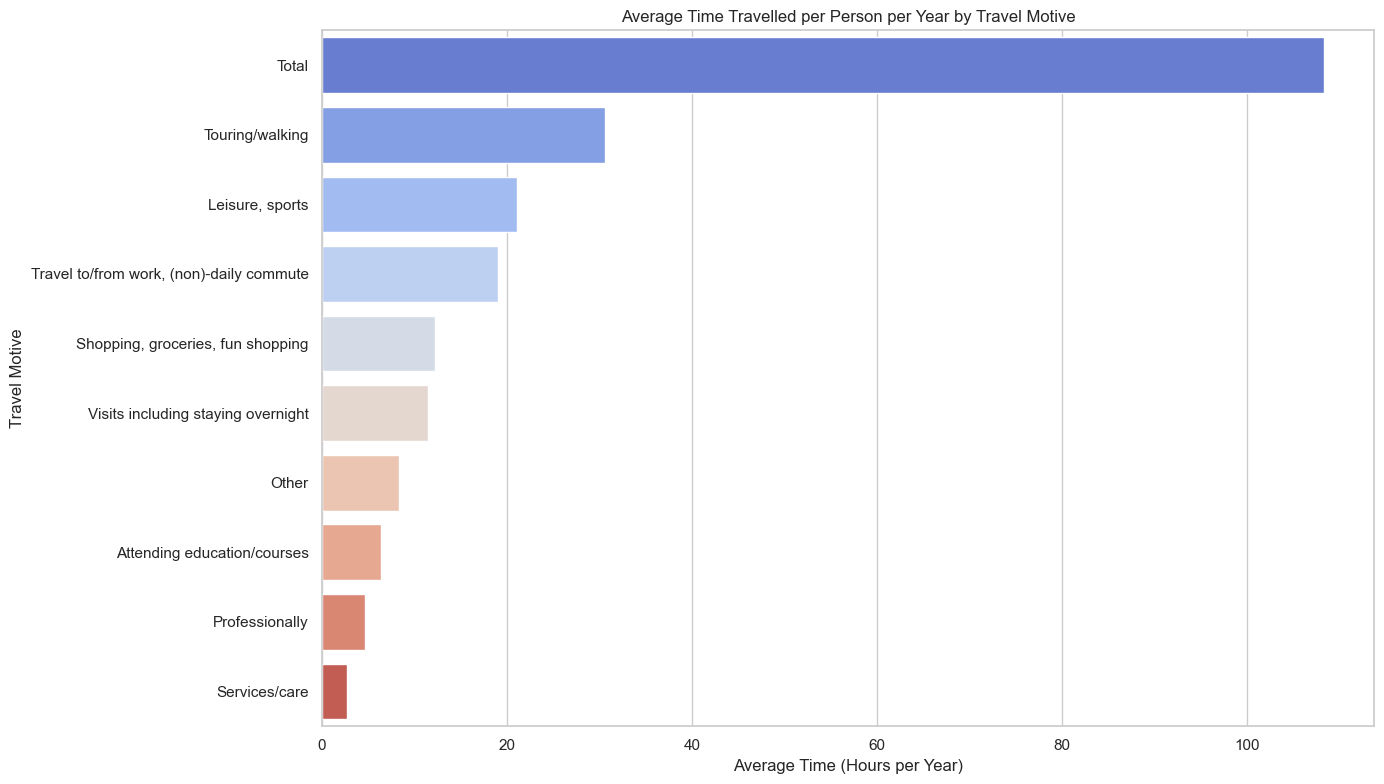

In [31]:
# Group by Travel Motive and calculate average time travelled per year
avg_time = filtered_trips.groupby('TravelMotives')['Time_Travelled_Hours_Per_Year'].mean().reset_index()

# Sort the data
avg_time.sort_values('Time_Travelled_Hours_Per_Year', inplace=True, ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_time, x='Time_Travelled_Hours_Per_Year', y='TravelMotives', palette='coolwarm')
plt.title('Average Time Travelled per Person per Year by Travel Motive')
plt.xlabel('Average Time (Hours per Year)')
plt.ylabel('Travel Motive')
plt.tight_layout()
plt.show()


/var/folders/zc/64yfk3l16nl3_zq6lr9yl6km0000gn/T/ipykernel_59473/3216102441.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_urban_trips, x='Trips_Per_Year', y='RegionCharacteristics', palette='pastel')


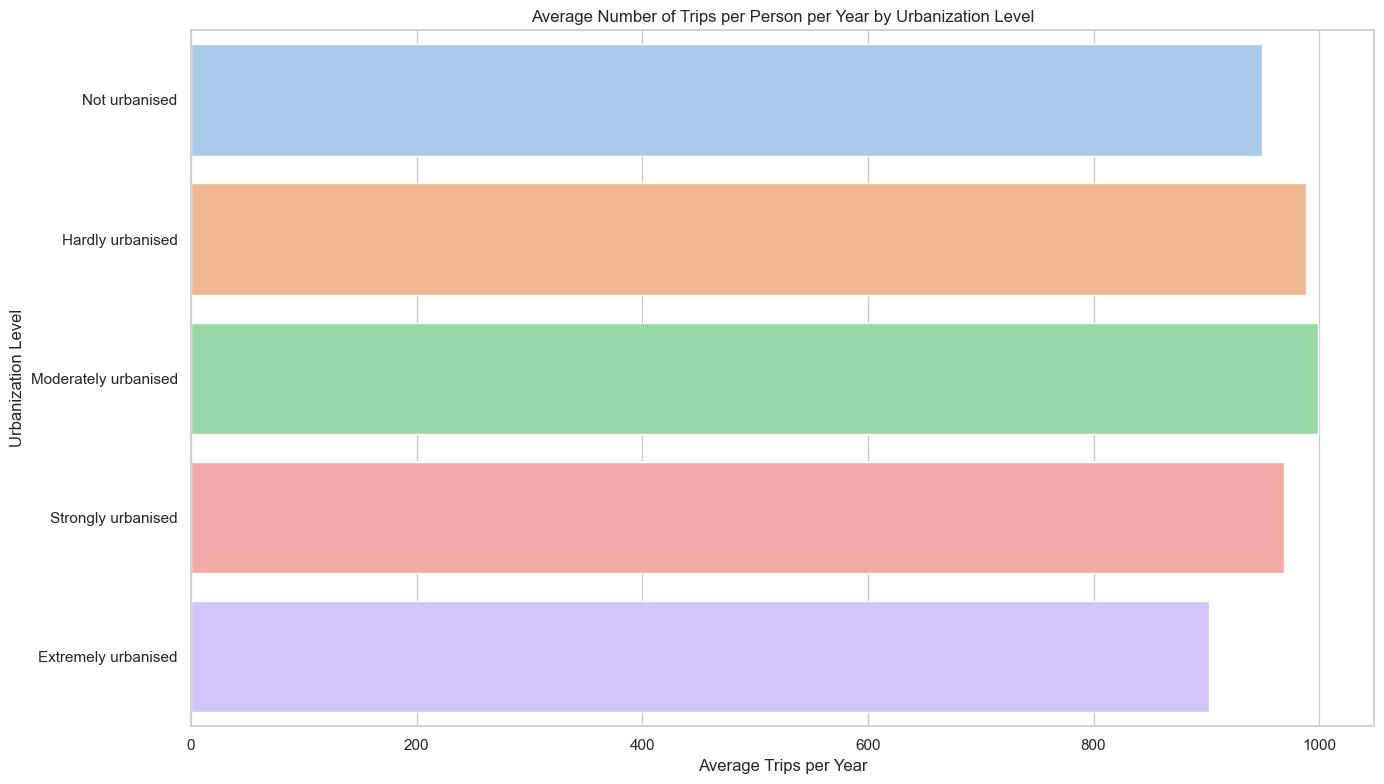

In [32]:
# Filter data for 'Total' travel motives and 'Total' travel modes
urban_trips = clean_data[
    (clean_data['TravelMotives'] == 'Total') &
    (clean_data['TravelModes'] == 'Total') &
    (clean_data['Population'] == 'Population 6 years or older') &
    (clean_data['Margins'] == 'Value') &
    (clean_data['RegionCharacteristics'].isin([
        'Extremely urbanised',
        'Strongly urbanised',
        'Moderately urbanised',
        'Hardly urbanised',
        'Not urbanised'
    ]))
]

# Group by Urbanization Level and calculate average trips per year
avg_urban_trips = urban_trips.groupby('RegionCharacteristics')['Trips_Per_Year'].mean().reset_index()

# Define the order of urbanization levels for plotting
urban_order = ['Not urbanised', 'Hardly urbanised', 'Moderately urbanised', 'Strongly urbanised', 'Extremely urbanised']
avg_urban_trips['RegionCharacteristics'] = pd.Categorical(
    avg_urban_trips['RegionCharacteristics'],
    categories=urban_order,
    ordered=True
)
avg_urban_trips.sort_values('RegionCharacteristics', inplace=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_urban_trips, x='Trips_Per_Year', y='RegionCharacteristics', palette='pastel')
plt.title('Average Number of Trips per Person per Year by Urbanization Level')
plt.xlabel('Average Trips per Year')
plt.ylabel('Urbanization Level')
plt.tight_layout()
plt.show()


/var/folders/zc/64yfk3l16nl3_zq6lr9yl6km0000gn/T/ipykernel_59473/1686577585.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_urban_distance, x='Distance_Travelled_PassengerKm_Per_Year', y='RegionCharacteristics', palette='Blues_d')


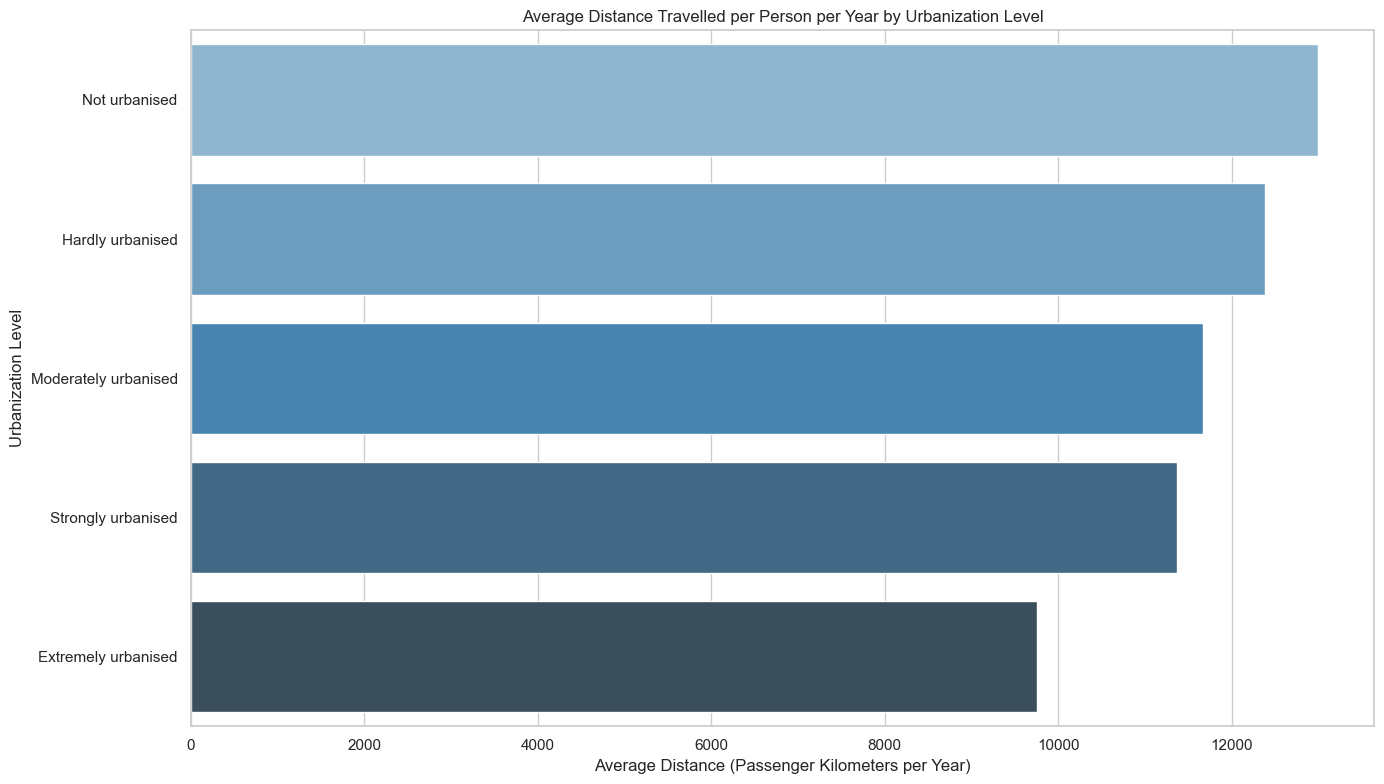

In [171]:
# Group by Urbanization Level and calculate average distance per year
avg_urban_distance = urban_trips.groupby('RegionCharacteristics')['Distance_Travelled_PassengerKm_Per_Year'].mean().reset_index()

# Ensure the order is maintained
avg_urban_distance['RegionCharacteristics'] = pd.Categorical(
    avg_urban_distance['RegionCharacteristics'],
    categories=urban_order,
    ordered=True
)
avg_urban_distance.sort_values('RegionCharacteristics', inplace=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_urban_distance, x='Distance_Travelled_PassengerKm_Per_Year', y='RegionCharacteristics', palette='Blues_d')
plt.title('Average Distance Travelled per Person per Year by Urbanization Level')
plt.xlabel('Average Distance (Passenger Kilometers per Year)')
plt.ylabel('Urbanization Level')
plt.tight_layout()
plt.show()


In [34]:
# Define the path for the cleaned data
clean_file_path = 'named_clean_mobility_data.csv'

# Save the cleaned data to CSV
clean_data.to_csv(clean_file_path, index=False)
print(f"Cleaned data saved to '{clean_file_path}'.")


Cleaned data saved to 'named_clean_mobility_data.csv'.


In [35]:
# Replace 'value' with the specific value you're looking for
value_clean_data = clean_data[clean_data['Margins'] == 'Value']

# Define the path for the named data
value_cleaned_named_file_path = 'values_named_clean_mobility_data.csv'

# Save the named data to CSV
value_clean_data.to_csv(value_cleaned_named_file_path, index=False)
print(f"Named data saved to '{value_cleaned_named_file_path}'.")

Named data saved to 'values_named_clean_mobility_data.csv'.


In [56]:
import plotly_express as px

travel_2018 = value_clean_data[value_clean_data['Period'] == '2018']

travelmode_2018 = travel_2018.groupby('TravelModes')
sumtravelmode_2018 = travelmode_2018['Distance_Travelled_PassengerKm_Per_Year'].sum().reset_index()
fig = px.bar(data_frame=sumtravelmode_2018,
              x = 'Distance_Travelled_PassengerKm_Per_Year',
              y = 'TravelModes',
              color = 'TravelModes')
fig.show()


In [58]:
travelmode_animation = value_clean_data.groupby(['TravelModes', 'Period']).sum('Distance_Travelled_PassengerKm_Per_Year').reset_index()
fig = px.bar(travelmode_animation, x = 'Distance_Travelled_PassengerKm_Per_Year', y = 'TravelModes', color = 'TravelModes',
                animation_frame = 'Period', range_x = [0, 1300000])
fig.show()